<a href="https://colab.research.google.com/github/Julianh1206/Cursos/blob/main/Trabajo_2_Int_Mineria_de_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo 2 Minería de datos
Hecho por:
* Brahian Steven Serna Restrepo
* Julián Castaño Pineda
* Julián Saavedra Echavarria
* Nataly Garcia Osorio


## **Punto 1: A partir del dataset auto-mpg.data-original.txt se trabajan los siguientes literales**

### **a. Cargue y explore el dataset explicando en qué consiste y las características que posee el mismo.**

In [ ]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [ ]:
# Definir los nombres de las variables
variables_nombres = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']

# Cargar la base de datos
df_AutoMPG = pd.read_csv('/content/sample_data/auto-mpg.data-original.txt', delim_whitespace=True, names=variables_nombres)

print("Primeras filas de la base de datos:")
df_AutoMPG.head()

Primeras filas de la base de datos:


mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0        8.0         307.0       130.0  3504.0          12.0   
1  15.0        8.0         350.0       165.0  3693.0          11.5   
2  18.0        8.0         318.0       150.0  3436.0          11.0   
3  16.0        8.0         304.0       150.0  3433.0          12.0   
4  17.0        8.0         302.0       140.0  3449.0          10.5   

   model_year  origin                   car_name  
0        70.0     1.0  chevrolet chevelle malibu  
1        70.0     1.0          buick skylark 320  
2        70.0     1.0         plymouth satellite  
3        70.0     1.0              amc rebel sst  
4        70.0     1.0                ford torino

In [ ]:
# Observar el tamaño de la base de datos, en formalo: (número de observaciones, número de variables)
print("Tamaño del dataset:")
df_AutoMPG.shape

Tamaño del dataset:


(406, 9)

El conjunto de datos 'auto-mpg.data-original.txt' proviene del Repositorio de Machine Learning de la UCI y contiene información sobre vehículos producidos en los años 70 y principios de los 80.
Específicamente, se recopilan características técnicas de 406 vehículos, que incluyen aspectos como el rendimiento del combustible, características del motor, y otras especificaciones físicas del vehículo. Este dataset es comúnmente utilizado para análisis y modelado predictivo en tareas de machine learning, particularmente en problemas de regresión. Se presentan a continuación las variables presentes:

1. **mpg (Millas por Galón)**
   - **Descripción:** Esta variable mide el rendimiento del vehículo en términos de millas recorridas por galón de combustible.
   - **Escala de Medición:** Escala de razón (ratio). Los valores son numéricos y continuos.
   - **Rango:** 9.0 a 46.6

2. **cylinders (Cilindros)**
   - **Descripción:** Representa el número de cilindros del motor del vehículo.
   - **Escala de Medición:** Escala ordinal. Aunque es una variable numérica, también puede ser considerada categórica ordinal, ya que se refiere a categorías específicas con un orden inherente.
   - **Valores posibles:** 3, 4, 5, 6, 8

3. **displacement (Desplazamiento)**
   - **Descripción:** Indica el desplazamiento del motor en pulgadas cúbicas, lo que da una idea del tamaño del motor.
   - **Escala de Medición:** Escala de razón (ratio). Los valores son numéricos y continuos.
   - **Rango:** 68.0 a 455.0

4. **horsepower (Caballos de Fuerza)**
   - **Descripción:** Mide la potencia del motor en caballos de fuerza.
   - **Escala de Medición:** Escala de razón (ratio). Los valores son numéricos y continuos.
   - **Rango:** 46.0 a 230.0

5. **weight (Peso)**
   - **Descripción:** Peso del vehículo en libras.
   - **Escala de Medición:** Escala de razón (ratio). Los valores son numéricos y continuos.
   - **Rango:** 1613 a 5140

6. **acceleration (Aceleración)**
   - **Descripción:** Tiempo que toma el vehículo para acelerar de 0 a 60 millas por hora, medido en segundos.
   - **Escala de Medición:** Escala de razón (ratio). Los valores son numéricos y continuos.
   - **Rango:** 8.0 a 24.8

7. **model_year (Año del Modelo)**
   - **Descripción:** Año en que se fabricó el modelo del vehículo.
   - **Escala de Medición:** Escala ordinal. Los valores son numéricos pero representan categorías específicas de años.
   - **Rango:** 70 (1970) a 82 (1982)

8. **origin (Origen)**
   - **Descripción:** Código que indica la región de origen del vehículo.
   - **Escala de Medición:** Escala nominal. Los valores son categóricos y no tienen un orden específico.
   - **Orden de los Valores:**
     - 1: USA
     - 2: Europa
     - 3: Asia

9. **car_name (Nombre del Auto)**
   - **Descripción:** Nombre del modelo del vehículo.
   - **Escala de Medición:** Escala nominal. Es un identificador categórico textual.
   - **Valores:** Nombres de vehículos específicos (por ejemplo, "chevrolet chevelle malibu").




In [ ]:
# Descripción general de la base de datos, con respecto a sus variables y el tipo:
print("\nDescripción general de los datos:")
df_AutoMPG.info()


Descripción general de los datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     406 non-null    float64
 2   displacement  406 non-null    float64
 3   horsepower    400 non-null    float64
 4   weight        406 non-null    float64
 5   acceleration  406 non-null    float64
 6   model_year    406 non-null    float64
 7   origin        406 non-null    float64
 8   car_name      406 non-null    object 
dtypes: float64(8), object(1)
memory usage: 28.7+ KB


In [ ]:
# Resumen de variables numéricas
print("\nResumen estadístico de las columnas numéricas:")
df_AutoMPG.describe()


Resumen estadístico de las columnas numéricas:


mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  406.000000    406.000000  400.000000   406.000000   
mean    23.514573    5.475369    194.779557  105.082500  2979.413793   
std      7.815984    1.712160    104.922458   38.768779   847.004328   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    105.000000   75.750000  2226.500000   
50%     23.000000    4.000000    151.000000   95.000000  2822.500000   
75%     29.000000    8.000000    302.000000  130.000000  3618.250000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model_year      origin  
count    406.000000  406.000000  406.000000  
mean      15.519704   75.921182    1.568966  
std        2.803359    3.748737    0.797479  
min        8.000000   70.000000    1.000000  
25%       13.700000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.175000   79.000000    2.000000  
max       24.800000   82.000000    3.000000

Las columnas numéricas (mpg, cylinders, displacement, horsepower, weight, acceleration, model_year) tienen una amplia gama de valores, lo que indica la diversidad en los vehículos representados en la base de datos. A continuación se presenta por variable:

- **mpg (millas por galón):** Varía desde 9.0 hasta 46.6, con una media de 23.51.
- **cylinders (cilindros):** Varía entre 3 y 8 cilindros, siendo 4 cilindros el valor más común.
- **displacement (desplazamiento):** Varía desde 68.0 hasta 455.0 pulgadas cúbicas.
- **horsepower (caballos de fuerza):** Varía entre 46.0 y 230.0, con algunos valores nulos.
- **weight (peso):** Varía desde 1613 hasta 5140 libras.
- **acceleration (aceleración):** Varía entre 8.0 y 24.8 segundos para alcanzar cierta velocidad.
- **model_year (año del modelo):** Varía entre 1970 y 1982.
- **origin (origen):** Se clasifica en 3 regiones: 1 (USA), 2 (Europa), 3 (Asia).

Vale la pena aclarar que solo es un análisis inicial, un primer acercamiento a los datos es importantísimo ya que debe haber un contexto y una familiarización con los mismos.

In [ ]:
# Comprobar si hay valores nulos
print("\nValores nulos por columna:")
df_AutoMPG.isnull().sum()


Valores nulos por columna:


mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

Hay valores nulos presentes en la columna horsepower y mpg. Estos valores deberán ser tratados en el preprocesamiento.

Es importante tener en cuenta la forma de la distribución de cada una de las variables, para así elegir el mejor método de imputación para dichos valores faltantes, a continuación se muestra el histrograma para ambas variables y con respecto a eso, se toma la decisión de decisión de imputación:

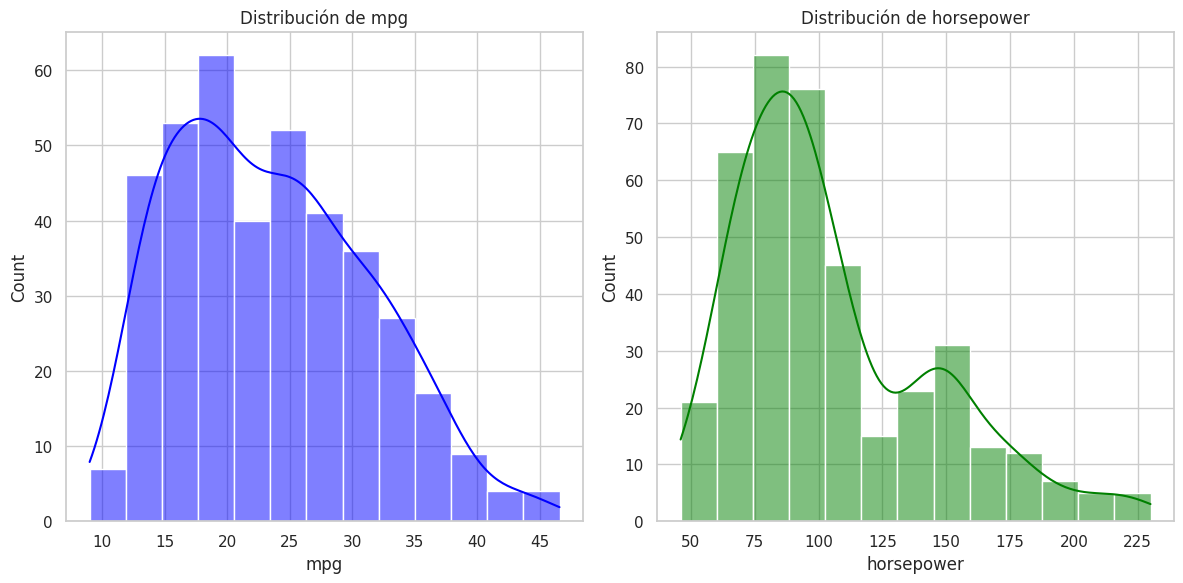

In [ ]:
# Configurar estilo para las gráficas
sns.set(style="whitegrid")

# Graficar la distribución de la variable 'mpg'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_AutoMPG['mpg'], kde=True, color='blue')
plt.title('Distribución de mpg')

# Graficar la distribución de la variable 'horsepower'
plt.subplot(1, 2, 2)
sns.histplot(df_AutoMPG['horsepower'], kde=True, color='green')
plt.title('Distribución de horsepower')

plt.tight_layout()
plt.show()

Distribución de mpg:

La distribución de mpg muestra un sesgo a la derecha (asimetría positiva), con una cola más larga hacia valores altos. Este tipo de distribución sugiere que la mediana podría ser un método más robusto para imputar los valores faltantes, ya que la mediana no se ve afectada por los valores extremos como lo haría la media.

In [ ]:
# Imputar valores faltantes en 'mpg' con la mediana
df_AutoMPG['mpg'].fillna(df_AutoMPG['mpg'].median(), inplace=True)

Distribución de horsepower:

La distribución de horsepower también es sesgada a la derecha, con una cola más larga hacia valores altos. Al igual que con mpg, la mediana sería una opción adecuada para imputar los valores faltantes, ya que manejará mejor los outliers presentes en la distribución.

In [ ]:
# Imputar valores faltantes en 'horsepower' con la mediana
df_AutoMPG['horsepower'].fillna(df_AutoMPG['horsepower'].median(), inplace=True)

Dado que ambas variables (mpg y horsepower) presentan distribuciones sesgadas con posibles outliers, la imputación por mediana es el método más adecuado para ambos casos. Este enfoque asegurará que los valores imputados no se vean influenciados por los valores extremos, proporcionando una imputación más robusta. Ahora, se confirma si no hay valores nulos en el dataset

In [ ]:
# Verificar que no hay valores nulos
print(df_AutoMPG.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64


Por lo tanto, se puede seguir con el procedimiento y no se tendrán problemas en el entrenamiento de algún posible modelo propuesto.

In [ ]:
# Distribución(tabla de frecuencia) de las columnas categóricas

## Para la variable origen:
df_AutoMPG['origin'].value_counts()

origin
1.0    254
3.0     79
2.0     73
Name: count, dtype: int64

La variable origen tiene tres valores distintos (1, 2, 3) que probablemente representan las regiones de origen de los vehículos (por ejemplo, 1 = USA, 2 = Europe, 3 = Asia).
Siendo así, se nota que la mayoría de los vehículos provienen de USA (1), seguido de Asia (3) y Europa (2).

In [ ]:
## Para la variable cylinders:

# Convertir la variable 'cylinders' a categórica
df_AutoMPG['cylinders'] = df_AutoMPG['cylinders'].astype('category')

df_AutoMPG['cylinders'].value_counts()

cylinders
4.0    207
8.0    108
6.0     84
3.0      4
5.0      3
Name: count, dtype: int64

La mayoría de los vehículos tienen 4 cilindros, seguido por 8 y 6 cilindros.

La exploración inicial del dataset ha permitido identificar características clave, como la presencia de valores faltantes y la distribución de las variables. Además, se ha definido la escala de medición de cada variable, lo que es fundamental para el análisis posterior. Los siguientes pasos incluirán el tratamiento de los valores faltantes y cualquier otro preprocesamiento necesario para garantizar que el dataset esté en óptimas condiciones para el análisis y modelado más detallado.

### **b. Indague sobre la varianza de cada uno de los atributos que conforman el dataset. ¿Existen atributos que podrían ser eliminados de acuerdo con la técnica de Low Variance Factor?**

La técnica de Low Variance Factor sugiere que si un atributo tiene una varianza muy baja, es probable que no aporte mucha información útil al modelo, ya que sus valores son casi constantes y no ayudan a diferenciar entre diferentes clases o categorías. Dichos atributos podrían ser candidatos para ser eliminados.

In [ ]:
# Seleccionar solo las columnas numéricas
numericas = df_AutoMPG.select_dtypes(include=[np.number])

# Normalizar los datos para que el rango de cada variable sea [0, 1]
scaler = MinMaxScaler()
datos_normalizados = scaler.fit_transform(numericas)
df_normalizados = pd.DataFrame(datos_normalizados, columns=numericas.columns)

In [ ]:
# Calcular la varianza de cada variable numérica
varianzas = df_normalizados.var()

# Mostrar la varianza de variable numérica
print("Varianza de cada atributo numérico:")
print(varianzas)

Varianza de cada atributo numérico:
mpg             0.042361
cylinders       0.117260
displacement    0.073505
horsepower      0.043781
weight          0.057671
acceleration    0.027844
model_year      0.097590
origin          0.158993
dtype: float64


Se utiliza MinMaxScaler() de sklearn.preprocessing para normalizar cada columna numérica del dataset a un rango [0, 1]. Esto asegura que la varianza de cada columna sea comparable y no dependa del rango original de los valores.

**Se aplica un umbral de varianza (en este caso, por decisión propia, 0.05) para identificar las columnas que podrían ser eliminadas debido a su baja varianza.**

In [ ]:
# Se define el umbral de varianza bajo considerado:
umbral = 0.05

# Identificar los atributos con varianza baja
low_variance_columnas = varianzas[varianzas < umbral].index.tolist()

# Mostrar los atributos con varianza baja
print("\nAtributos con varianza baja (menor al umbral de {}):".format(umbral))
print(low_variance_columnas)


Atributos con varianza baja (menor al umbral de 0.05):
['mpg', 'horsepower', 'acceleration']


Las variables mpg, horsepower, y acceleration presentan una baja variabilidad en los datos después de la normalización (con el umbral propuesto), lo que sugiere que estas características podrían no ser informativas o diferenciadoras en un modelo predictivo. Sin embargo, antes de eliminarlas, es crucial evaluar si estas variables aportan valor en el contexto específico del análisis o si su baja variabilidad podría ser relevante para ciertas aplicaciones o modelos.

### **c. Evalúe la relación entre atributos a partir del coeficiente de correlación de Pearson y un análisis gráfico de heatmap para estudiar la posibilidad de eliminar redundancia en el dataset. En caso de corresponder, aplique las técnicas de Reducing Highly Correlated Columns trabajadas en clase.**

Para evaluar la redundancia entre atributos en el dataset, se puede utilizar el coeficiente de correlación de Pearson y un análisis gráfico mediante un heatmap. Esto permitirá identificar pares de atributos que estén altamente correlacionados y que, por lo tanto, podrían ser redundantes.

In [ ]:
# Calculando la matriz de correlación de Pearson unicamente con las variables numéricas en el Dataset
matriz_corr = numericas.corr()

In [ ]:
# Mostrar la matriz de correlación
print("Matriz de correlación de Pearson:")
print(matriz_corr)

Matriz de correlación de Pearson:
                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.763451     -0.792077   -0.760926 -0.823985   
cylinders    -0.763451   1.000000      0.951787    0.842307  0.895220   
displacement -0.792077   0.951787      1.000000    0.896703  0.932475   
horsepower   -0.760926   0.842307      0.896703    1.000000  0.864369   
weight       -0.823985   0.895220      0.932475    0.864369  1.000000   
acceleration  0.410449  -0.522452     -0.557984   -0.694415 -0.430086   
model_year    0.567223  -0.360762     -0.381714   -0.421699 -0.315389   
origin        0.561354  -0.567478     -0.613056   -0.457162 -0.584109   

              acceleration  model_year    origin  
mpg               0.410449    0.567223  0.561354  
cylinders        -0.522452   -0.360762 -0.567478  
displacement     -0.557984   -0.381714 -0.613056  
horsepower       -0.694415   -0.421699 -0.457162  
weight           -0.430086   -0.315389 -0.584109  
ac

Se calculó la matriz de correlación de Pearson utilizando el método corr() de pandas.

Se obtuvo la matriz de correlación donde cada valor indica el grado de asociación lineal entre dos variables. Valores cercanos a 1 o -1 indican una alta correlación, mientras que valores cercanos a 0 indican poca o ninguna correlación.

Ahora, con el gráfico heatmap el objetivo es facilitar la identificación de relaciones fuertes entre variables mediante una visualización gráfica, presentada a continuación:

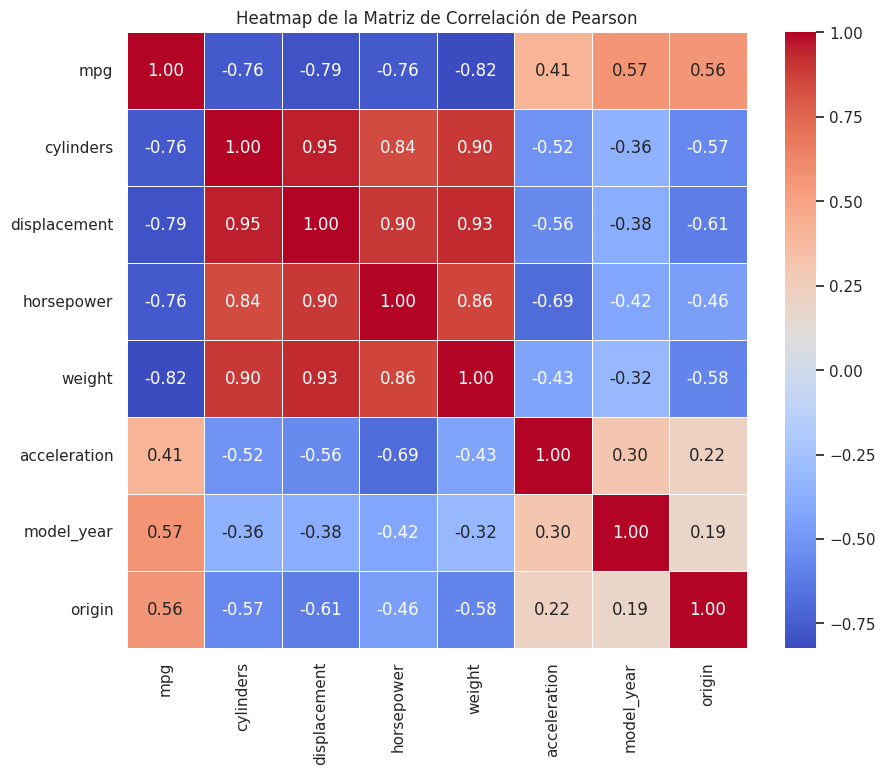

In [ ]:
# Visualización del heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap de la Matriz de Correlación de Pearson')
plt.show()

Para identificar pares de variables con alta correlación en un dataset, se define primero un umbral de correlación, en este caso establecido en 0.7. Luego, utilizando un ciclo for anidado, se recorre la matriz de correlación, evaluando cada par de variables. Si el valor absoluto de la correlación entre dos variables supera el umbral, se almacena dicho par, junto con su valor de correlación real, en una lista llamada pares_corr. Este proceso permite identificar y registrar de manera eficiente los pares de variables que podrían ser redundantes, facilitando su posterior análisis y posible eliminación para optimizar el conjunto de datos.

In [ ]:
# Umbral para correlación alta
umbral_corr = 0.7

# Identificar pares de variables con alta correlación y agregar a la lista pres_corr
pares_corr = []
for i in range(len(matriz_corr.columns)):
    for j in range(i):
        if abs(matriz_corr.iloc[i, j]) > umbral_corr:
            colname = matriz_corr.columns[i]
            rowname = matriz_corr.columns[j]
            pares_corr.append((rowname, colname, matriz_corr.iloc[i, j]))

# Mostrar los pares de columnas altamente correlacionadas
print("\nPares de columnas altamente correlacionadas (umbral > {}):".format(umbral_corr))
for pair in pares_corr:
    print(f"{pair[0]} y {pair[1]}: {pair[2]:.2f}")


Pares de columnas altamente correlacionadas (umbral > 0.7):
mpg y cylinders: -0.76
mpg y displacement: -0.79
cylinders y displacement: 0.95
mpg y horsepower: -0.76
cylinders y horsepower: 0.84
displacement y horsepower: 0.90
mpg y weight: -0.82
cylinders y weight: 0.90
displacement y weight: 0.93
horsepower y weight: 0.86


Utilizando la técnica Reducing Highly Correlated Columns. Se conserva la variable que, en promedio, tiene menor correlación con las demás.

In [ ]:
# Reducción de columnas altamente correlacionadas
# Conservaremos la columna que, en promedio, tenga menor correlación con las demás
variables_eliminar = []
for pares in pares_corr:
    media_corr_obs = matriz_corr[pares[0]].mean()
    media_corr_var = matriz_corr[pares[1]].mean()
    if media_corr_obs > media_corr_var:
        variables_eliminar.append(pares[0])
    else:
        variables_eliminar.append(pares[1])

# Eliminar duplicados en la lista de columnas a eliminar
variables_eliminar = list(set(variables_eliminar))

# Mostrar las columnas que serán eliminadas
print("\nColumnas que serán eliminadas para reducir la redundancia:")
print(variables_eliminar)


Columnas que serán eliminadas para reducir la redundancia:
['weight', 'displacement', 'horsepower', 'cylinders']


Notese que una de las variables que se plantea eliminar es la cantidad de cilindros, por lo que se elimina dicha variable de la lista variables_eliminar (para no eliminarla del dataset original), ya que en el próximo literal se debe trabajar con ella para predecir la cantidad de cilindros de un auto.

In [ ]:
# Eliminar la variable 'cylinders' de la lista si está presente
if 'cylinders' in variables_eliminar:
    variables_eliminar.remove('cylinders')

# Eliminar las columnas redundantes del dataset
df_AutoMPG_reduccion = df_AutoMPG.drop(columns=variables_eliminar)

# Convertir la variable 'cylinders' a categórica
df_AutoMPG_reduccion['cylinders'] = df_AutoMPG_reduccion['cylinders'].astype('category')

# Mostrar el nuevo dataset con la reducción de dimensionalidad:
print("\nResumen estadístico de las columnas numéricas del nuevo dataset:")
df_AutoMPG_reduccion.describe()


Resumen estadístico de las columnas numéricas del nuevo dataset:


mpg  acceleration  model_year      origin
count  406.000000    406.000000  406.000000  406.000000
mean    23.504433     15.519704   75.921182    1.568966
std      7.738736      2.803359    3.748737    0.797479
min      9.000000      8.000000   70.000000    1.000000
25%     17.500000     13.700000   73.000000    1.000000
50%     23.000000     15.500000   76.000000    1.000000
75%     29.000000     17.175000   79.000000    2.000000
max     46.600000     24.800000   82.000000    3.000000

In [ ]:
## Para la variable cylinders:
df_AutoMPG_reduccion['cylinders'].value_counts()

cylinders
4.0    207
8.0    108
6.0     84
3.0      4
5.0      3
Name: count, dtype: int64

In [ ]:
# Eliminar la columna 'car_name' del dataset
df_AutoMPG_reduccion = df_AutoMPG_reduccion.drop(columns=['car_name'])

Utilizando la lista de pares de variables correlacionadas, se comparó la correlación media de cada variable con las demás en el dataset. La columna con la mayor correlación promedio se identificó como redundante y fue eliminada. Como resultado, las columnas weight, displacement, y horsepower fueron seleccionadas para ser eliminadas debido a su alta correlación con otras variables. Esta reducción de redundancia simplifica el modelo, reduciendo la multicolinealidad y mejorando la eficiencia del análisis sin perder información significativa.
Otra variable de poco interés es el nombre del carro, ya que no se considera directamente en el análisis y por ser de tipo caracter podría generar problemas en el/los modelos propuestos.

### **d. Por último, compare la importancia de cada uno de los atributos en función de la técnica de determinación de Random Forest (suponiendo que intenta predecir la cantidad de cilindros de un auto). Analice la importancia de las variables de modo analítico y gráfico.**

In [ ]:
# importar RandomForestClassifier de la bibliotecca sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier

# Definir características (X) y la variable objetivo (y)
X = df_AutoMPG_reduccion.drop(columns=['cylinders'])  # Excluir 'cylinders' ya que es la variable objetivo
y = df_AutoMPG_reduccion['cylinders']

# Crear y entrenar el modelo de Random Forest
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X, y)

RandomForestClassifier(random_state=42)

In [ ]:
# Obtener importancias de características
importancias = modelo.feature_importances_

# Crear un DataFrame para visualizar las importancias
importancias_df = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': importancias
}).sort_values(by='Importancia', ascending=False)

# Mostrar la importancia de cada atributo de forma analítica
print("Importancia de los atributos en la predicción de 'cylinders':")
print(importancias_df)

Importancia de los atributos en la predicción de 'cylinders':
       Variable  Importancia
0           mpg     0.515555
1  acceleration     0.285705
3        origin     0.107251
2    model_year     0.091489


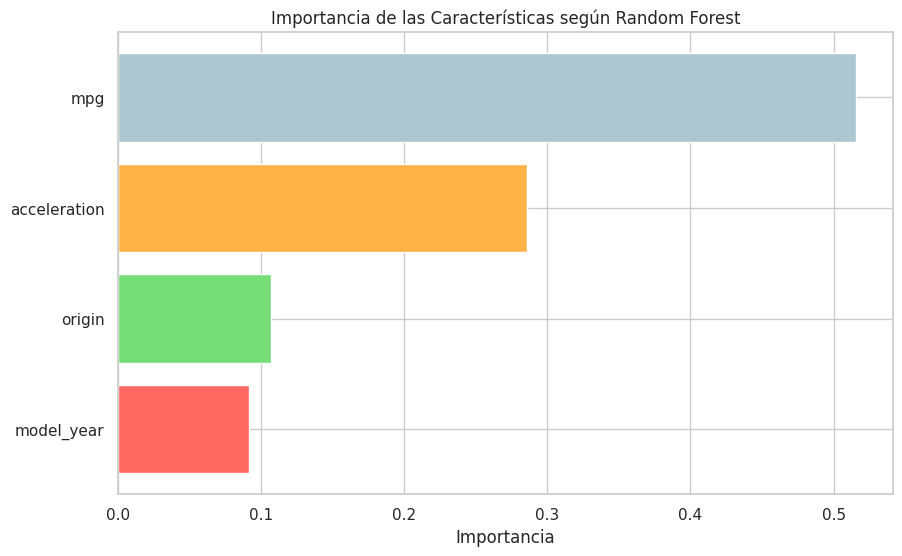

In [ ]:
# Definir una paleta de colores pastel para mejorar la visualización del gráfico
paletas_pastel = ['#AEC6CF', '#FFB347', '#77DD77', '#FF6961', '#CFCFC4', '#F49AC2', '#FFD1DC', '#CB99C9', '#C4E17F', '#B39EB5']

# Asignación de colores basada en la paleta pastel
colores = paletas_pastel * (len(importancias_df) // len(paletas_pastel) + 1)
colores = colores[:len(importancias_df)]

# Visualización gráfica de la importancia de las variables
plt.figure(figsize=(10, 6))
plt.barh(importancias_df['Variable'], importancias_df['Importancia'], color = colores)
plt.xlabel('Importancia')
plt.title('Importancia de las Características según Random Forest')
plt.gca().invert_yaxis()  # Invertir el eje Y para que la característica más importante aparezca arriba
plt.show()

### Conclusión sobre la Importancia de las Características según Random Forest

Los resultados obtenidos del modelo de Random Forest, que se entrenó para predecir la cantidad de cilindros en un auto, muestran claramente la importancia relativa de cada una de las variables en el dataset reducido.

1. **`mpg` (Millas por Galón):** Es la característica más influyente, con una importancia de aproximadamente 0.52. Esto indica que la eficiencia en el consumo de combustible es un factor clave en la determinación del número de cilindros de un vehículo. Un mayor número de cilindros suele estar asociado con motores más grandes y, por lo tanto, con un menor rendimiento de combustible.

2. **`acceleration` (Aceleración):** Con una importancia de alrededor de 0.29, la aceleración es la segunda variable más relevante. Esto sugiere que el tiempo que toma un vehículo para alcanzar una velocidad determinada está fuertemente relacionado con el número de cilindros, ya que los motores con más cilindros suelen ofrecer una mayor potencia y, en consecuencia, una mejor aceleración.

3. **`origin` (Origen):** La variable que indica el origen del vehículo tiene una importancia de aproximadamente 0.11. Esto puede reflejar diferencias regionales en el diseño y las preferencias de los motores, donde ciertos mercados podrían favorecer vehículos con más cilindros.

4. **`model_year` (Año del Modelo):** Es la variable con menor importancia, alrededor de 0.09. Aunque tiene cierta influencia, su efecto es menos significativo en comparación con las otras variables. Esto podría deberse a que, aunque la tecnología y las tendencias de diseño han evolucionado con el tiempo, el número de cilindros se mantiene más constante en función de otros factores como el tipo de vehículo y la región de fabricación.


En conjunto, los resultados indican que las características relacionadas directamente con el rendimiento del motor (`mpg` y `acceleration`) son las más determinantes en la predicción del número de cilindros. Las variables `origin` y `model_year`, aunque influyentes, juegan un papel secundario. Estos insights pueden guiar futuras decisiones sobre qué variables priorizar en modelos predictivos similares o en análisis de diseño de vehículos.

## **Punto 2: A partir del dataset covid19.csv (generado con datos publicados en el sitio https://www.worldometers.info/coronavirus/) realice los siguientes análisis:**

### **A) Importaremos el csv y observaremos el estado de los datos.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
# Lectura de datos covid BRAHIAN:
df_covid = pd.read_csv('/content/drive/My Drive/Datos/Mineria/Trabajo2/covid19.csv')

In [ ]:
# Muestra las primeras filas del dataframe
df_covid.head(4)

rank country      cases  deaths recovered     active critical cases_1Mpop  \
0     1     USA  1,696,547  99,561   456,595  1,140,391   17,065       5,129   
1     2  Brazil    367,906  22,965   149,911    195,030    8,318       1,732   
2     3  Russia    353,427   3,633   118,798    230,996    2,300       2,422   
3     4   Spain    282,852  28,752   196,958     57,142      854       6,050   

  deaths_1Mpop       tests tests_1Mpop   population      continent  
0          301  15,029,393      45,433  330,806,424  North America  
1          108     735,224       3,461  212,405,664  South America  
2           25   8,945,384      61,300  145,928,315         Europe  
3          615   3,556,567      76,071   46,752,999         Europe

In [ ]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   rank          215 non-null    int64 
 1   country       215 non-null    object
 2   cases         215 non-null    object
 3   deaths        183 non-null    object
 4   recovered     211 non-null    object
 5   active        213 non-null    object
 6   critical      129 non-null    object
 7   cases_1Mpop   213 non-null    object
 8   deaths_1Mpop  181 non-null    object
 9   tests         189 non-null    object
 10  tests_1Mpop   189 non-null    object
 11  population    215 non-null    object
 12  continent     213 non-null    object
dtypes: int64(1), object(12)
memory usage: 22.0+ KB


Hay un poco de incongruencia con los tipos de datos, ya que hay algunas variables que deberían estar continuas y se están leyendo como con un tipo de dato no correspondiente, a continuación se hace un poco de limpieza y transformación de datos para continuar con el taller presente.

In [ ]:
df_covid["cases"] = df_covid["cases"].str.replace(',','').astype("float64")
df_covid["deaths"] = df_covid["deaths"].str.replace(',','').astype("float64")
df_covid["recovered"] = df_covid["recovered"].str.replace(',','').astype("float64")
df_covid["active"] = df_covid["active"].str.replace(',','').astype("float64")
df_covid["critical"] = df_covid["critical"].str.replace(',','').astype("float64")
df_covid["cases_1Mpop"] = df_covid["cases_1Mpop"].str.replace(',','').astype("float64")
df_covid["deaths_1Mpop"] = df_covid["deaths_1Mpop"].str.replace(',','').astype("float64")
df_covid["tests"] = df_covid["tests"].str.replace(',','').astype("float64")
df_covid["tests_1Mpop"] = df_covid["tests_1Mpop"].str.replace(',','').astype("float64")
df_covid["population"] = df_covid["population"].str.replace(',','').astype("float64")

### Observación de datos nulos:

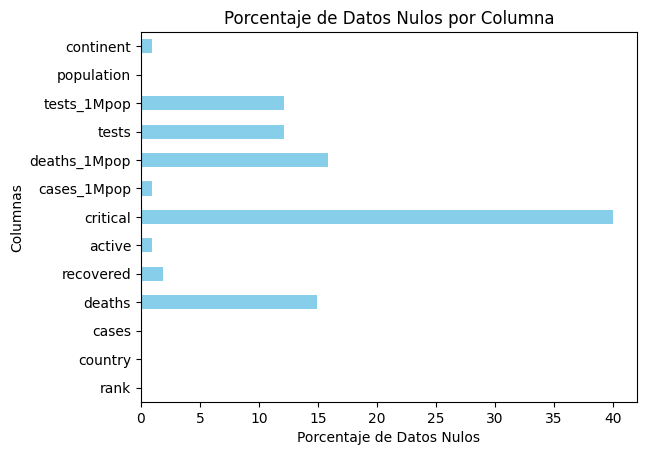

In [ ]:
# Calcular el porcentaje de datos nulos por columna
null_percentages = df_covid.isnull().mean() * 100

# Crear la barra de porcentajes
null_percentages.plot(kind='barh', color='skyblue')

# Agregar etiquetas y título
plt.xlabel('Porcentaje de Datos Nulos')
plt.ylabel('Columnas')
plt.title('Porcentaje de Datos Nulos por Columna')

# Mostrar el gráfico
plt.show()

Sé observa que la variable critical tiene un alto porcentaje de datos nulos, esto se tendrá en cuenta a medida que avanzaremos con este taller y también teniendo en cuenta de las demás variables que algunos valores nulos.

### Descripción de las variables:

rank: Posición en el ranking mundial según el número de casos confirmados. El país con más casos ocupa el primer lugar.

country: Nombre del país.

cases: Número total de casos confirmados de COVID-19 en el país.

deaths: Número total de muertes atribuidas a COVID-19 en el país.

recovered: Número total de personas que se han recuperado de COVID-19 en el país.

active: Número total de casos activos de COVID-19, es decir, personas que están actualmente enfermas (casos activos = casos totales - muertes - recuperados).

critical: Número total de personas en estado crítico debido a COVID-19.

cases_1Mpop: Número de casos confirmados por cada millón de habitantes del país.

deaths_1Mpop: Número de muertes por COVID-19 por cada millón de habitantes del país.

tests: Número total de pruebas de COVID-19 realizadas en el país.

tests_1Mpop: Número de pruebas de COVID-19 realizadas por cada millón de habitantes del país.

population: Población total del país.

continent: Continente al que pertenece el país.

Estas variables ayudan a comparar el impacto de COVID-19 en diferentes países y continentes.

In [ ]:
df_covid[df_covid['population'] == 0]

rank           country  cases  deaths  recovered  active  critical  \
120   121  Diamond Princess  712.0    13.0      651.0    48.0       4.0   
206   207        MS Zaandam    9.0     2.0        NaN     7.0       NaN   

     cases_1Mpop  deaths_1Mpop  tests  tests_1Mpop  population continent  
120          NaN           NaN    NaN          NaN         0.0       NaN  
206          NaN           NaN    NaN          NaN         0.0       NaN

Se observa que hay dos países que no tienen población, por tanto se eliminarán estos 2 registros dado que no tienen sentido y pueden introducir sesgo en los datos.

In [ ]:
df_covid = df_covid[df_covid['population'] != 0]
df_covid[df_covid['population'] == 0]

Empty DataFrame
Columns: [rank, country, cases, deaths, recovered, active, critical, cases_1Mpop, deaths_1Mpop, tests, tests_1Mpop, population, continent]
Index: []

### B) Normalicemos y observemos la distribución de las variables

A continuación aplicaremos distintos métodos de normalización y observaremos su comportamiento después la respectiva transformación en los histogramas y densidades, como se pudo observar, tenemos en nuestro dataset 10 variables en forma continua a quienes podemos aplicar métodos de normalización, se aplicará Min-Max, Z-Score y Decimal Scaling ya todas ellas para posteriormente hacer una comparación entre ellas.

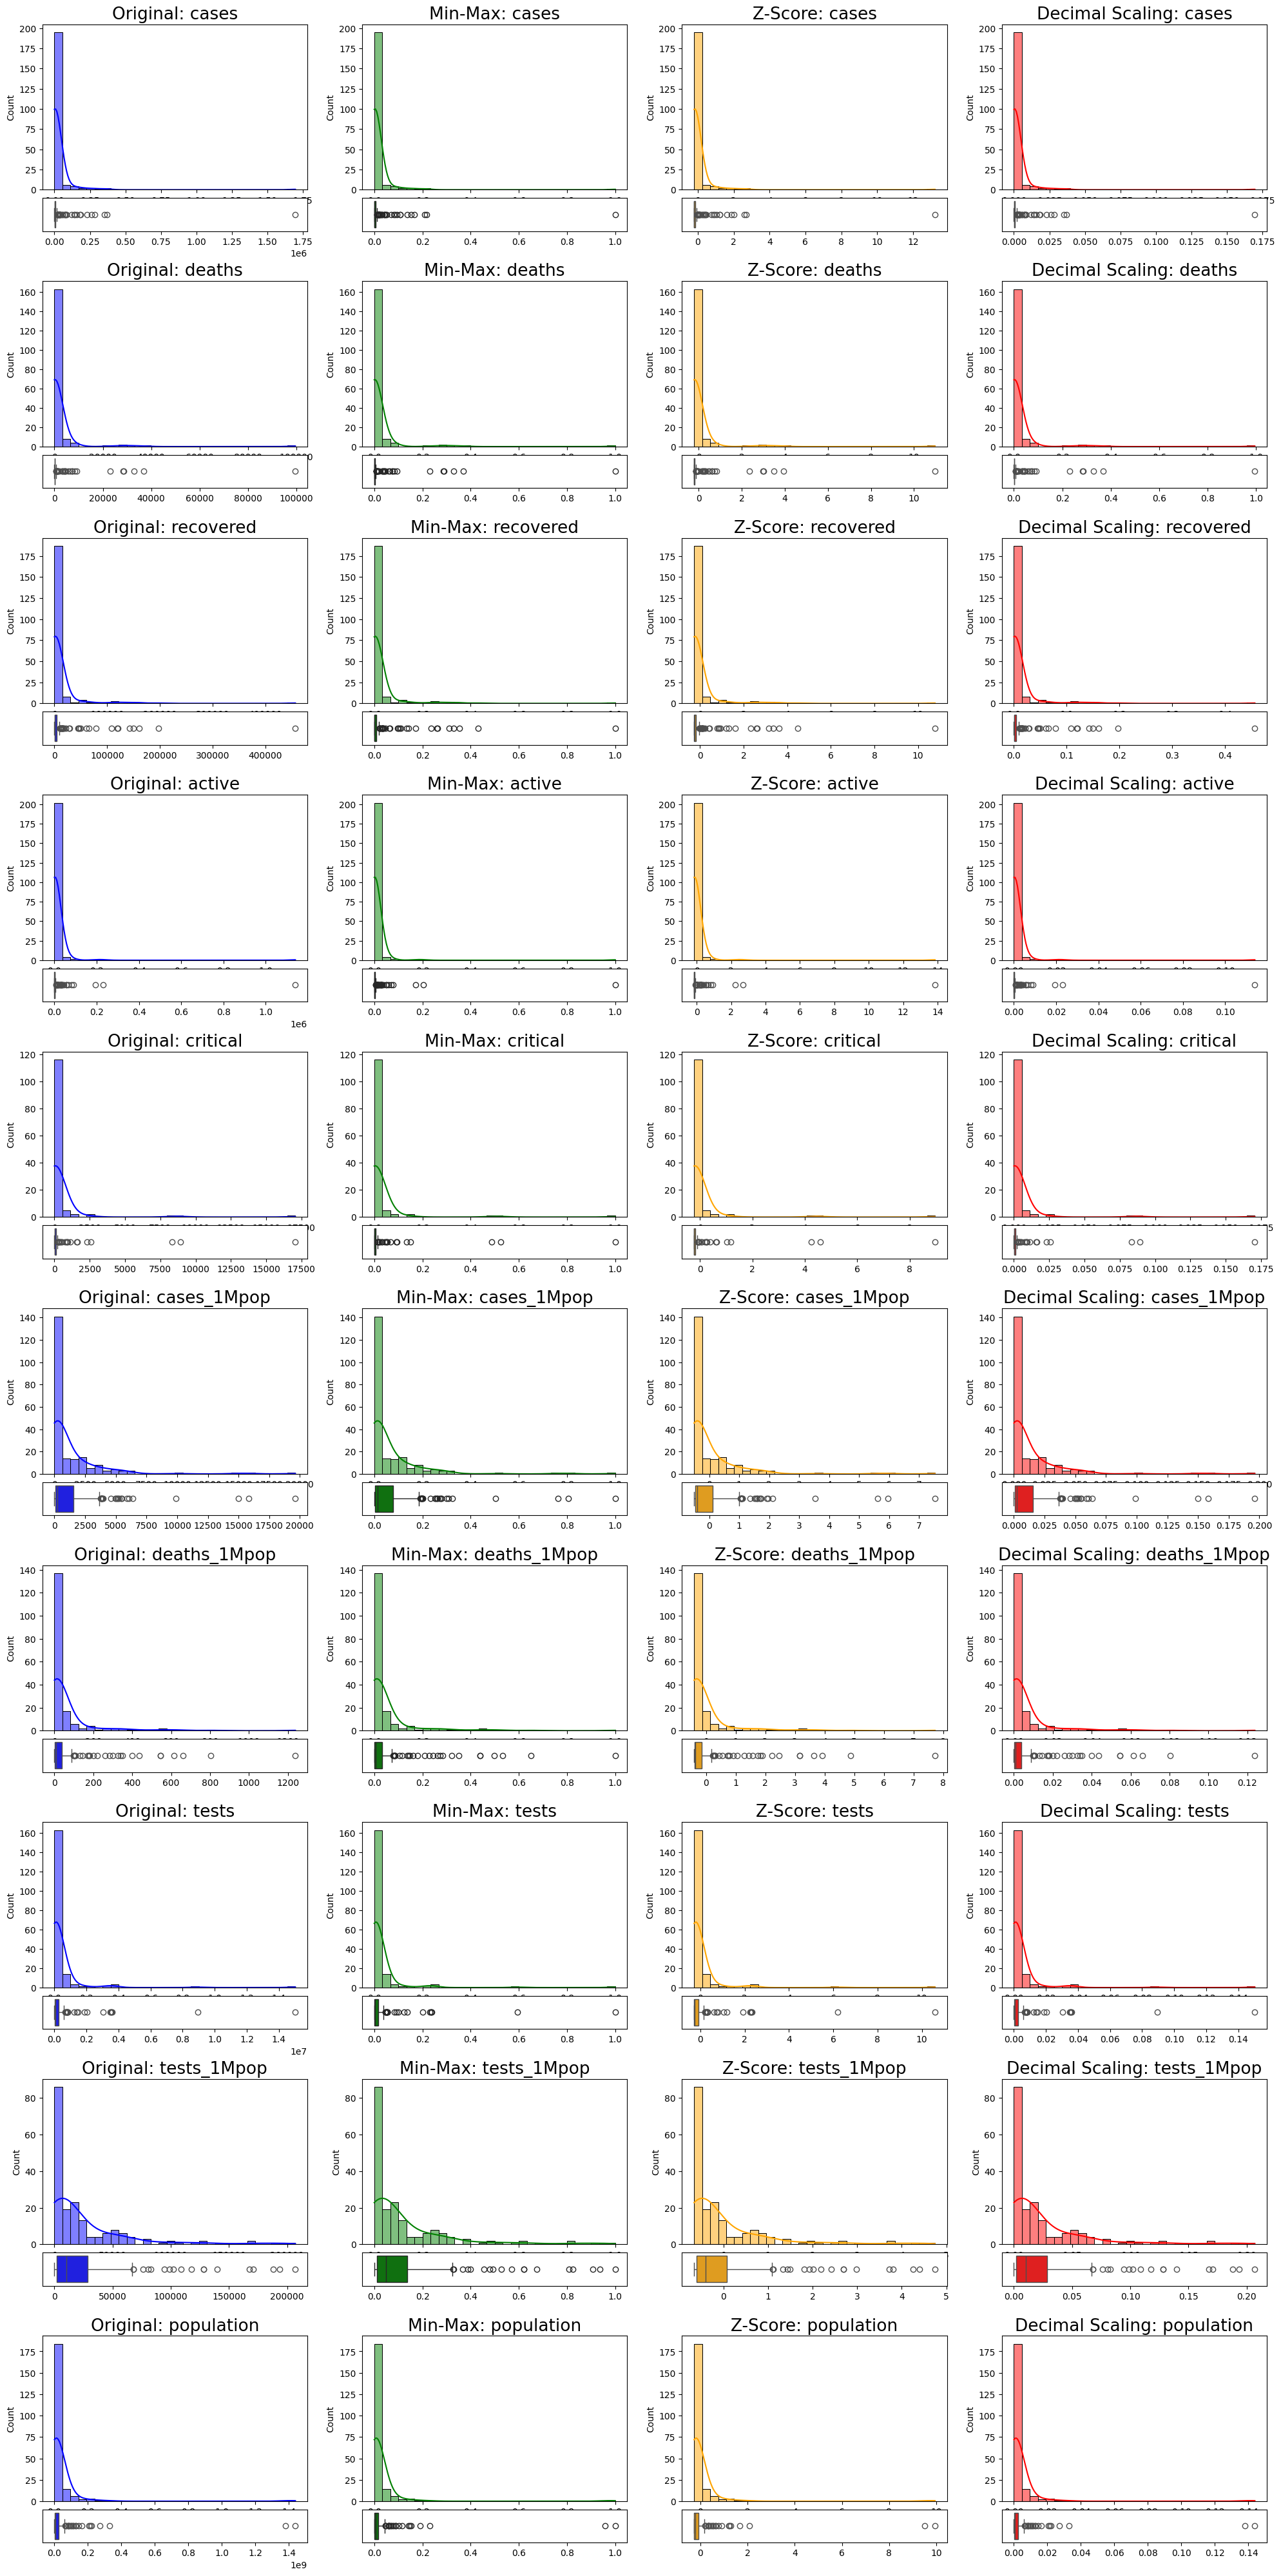

In [ ]:
# Selecciona las variables continuas
variables_continuas = ['cases', 'deaths', 'recovered', 'active', 'critical',
                       'cases_1Mpop', 'deaths_1Mpop', 'tests', 'tests_1Mpop', 'population']

# Extrae las variables continuas del DataFrame
df_continuas = df_covid[variables_continuas]

# Normalización Min-Max
scaler_minmax = MinMaxScaler()
df_minmax = pd.DataFrame(scaler_minmax.fit_transform(df_continuas), columns=variables_continuas)

# Normalización Z-Score
scaler_zscore = StandardScaler()
df_zscore = pd.DataFrame(scaler_zscore.fit_transform(df_continuas), columns=variables_continuas)

# Normalización Decimal Scaling
df_decimal = df_continuas / (10 ** np.ceil(np.log10(df_continuas.abs().max())))

# Crear los subplots
fig, axes = plt.subplots(nrows=10, ncols=4, figsize=(20, 40))

for i, var in enumerate(variables_continuas):
    for j, df in enumerate([df_continuas, df_minmax, df_zscore, df_decimal]):
        # Crear un GridSpec para ajustar el boxplot debajo del histograma
        ax_hist = axes[i, j]

        # Histogram and Density
        sns.histplot(df[var], bins=30, kde=True, ax=ax_hist, color=['blue', 'green', 'orange', 'red'][j])
        ax_hist.set_title(f'{["Original", "Min-Max", "Z-Score", "Decimal Scaling"][j]}: {var}', fontsize=19)

        # Crear un eje secundario para el boxplot dentro de la misma figura
        ax_box = ax_hist.inset_axes([0, -0.25, 1, 0.2])
        sns.boxplot(x=df[var], ax=ax_box, color=['blue', 'green', 'orange', 'red'][j])
        ax_box.set_xlabel('')
        ax_box.set_yticks([])

        # Ajustar las posiciones para que el boxplot no se solape con el histograma
        ax_hist.figure.subplots_adjust(hspace=0.4)

plt.tight_layout()
plt.show()



En términos generales al aplicar estos métodos de normalización aparentemente quedan muy similar a la distribución original en cada una de las variables, parece que las transformaciones capturan el comportamiento de la distribución original, incluso muchos de los datos atípicos transformados se comportan similar a la distribución original en la información.

También cabe aclarar que estos datos atípicos muchas veces no dejan hacer la correcta observación y análisis de los histogramas por lo que una recomendación futura es hacer tratamiento de datos atípicos, por ahora avanzaremos teniendo esto en cuenta.


### C) Aplicaremos distintos métodos de discretización y evaluaremos como se ajustan a la información correspondiente.

Observaremos como el resultado de aplicar los métodos de discretizacion de igual ancho, igual frecuencia y K-Means

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:322: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 4 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


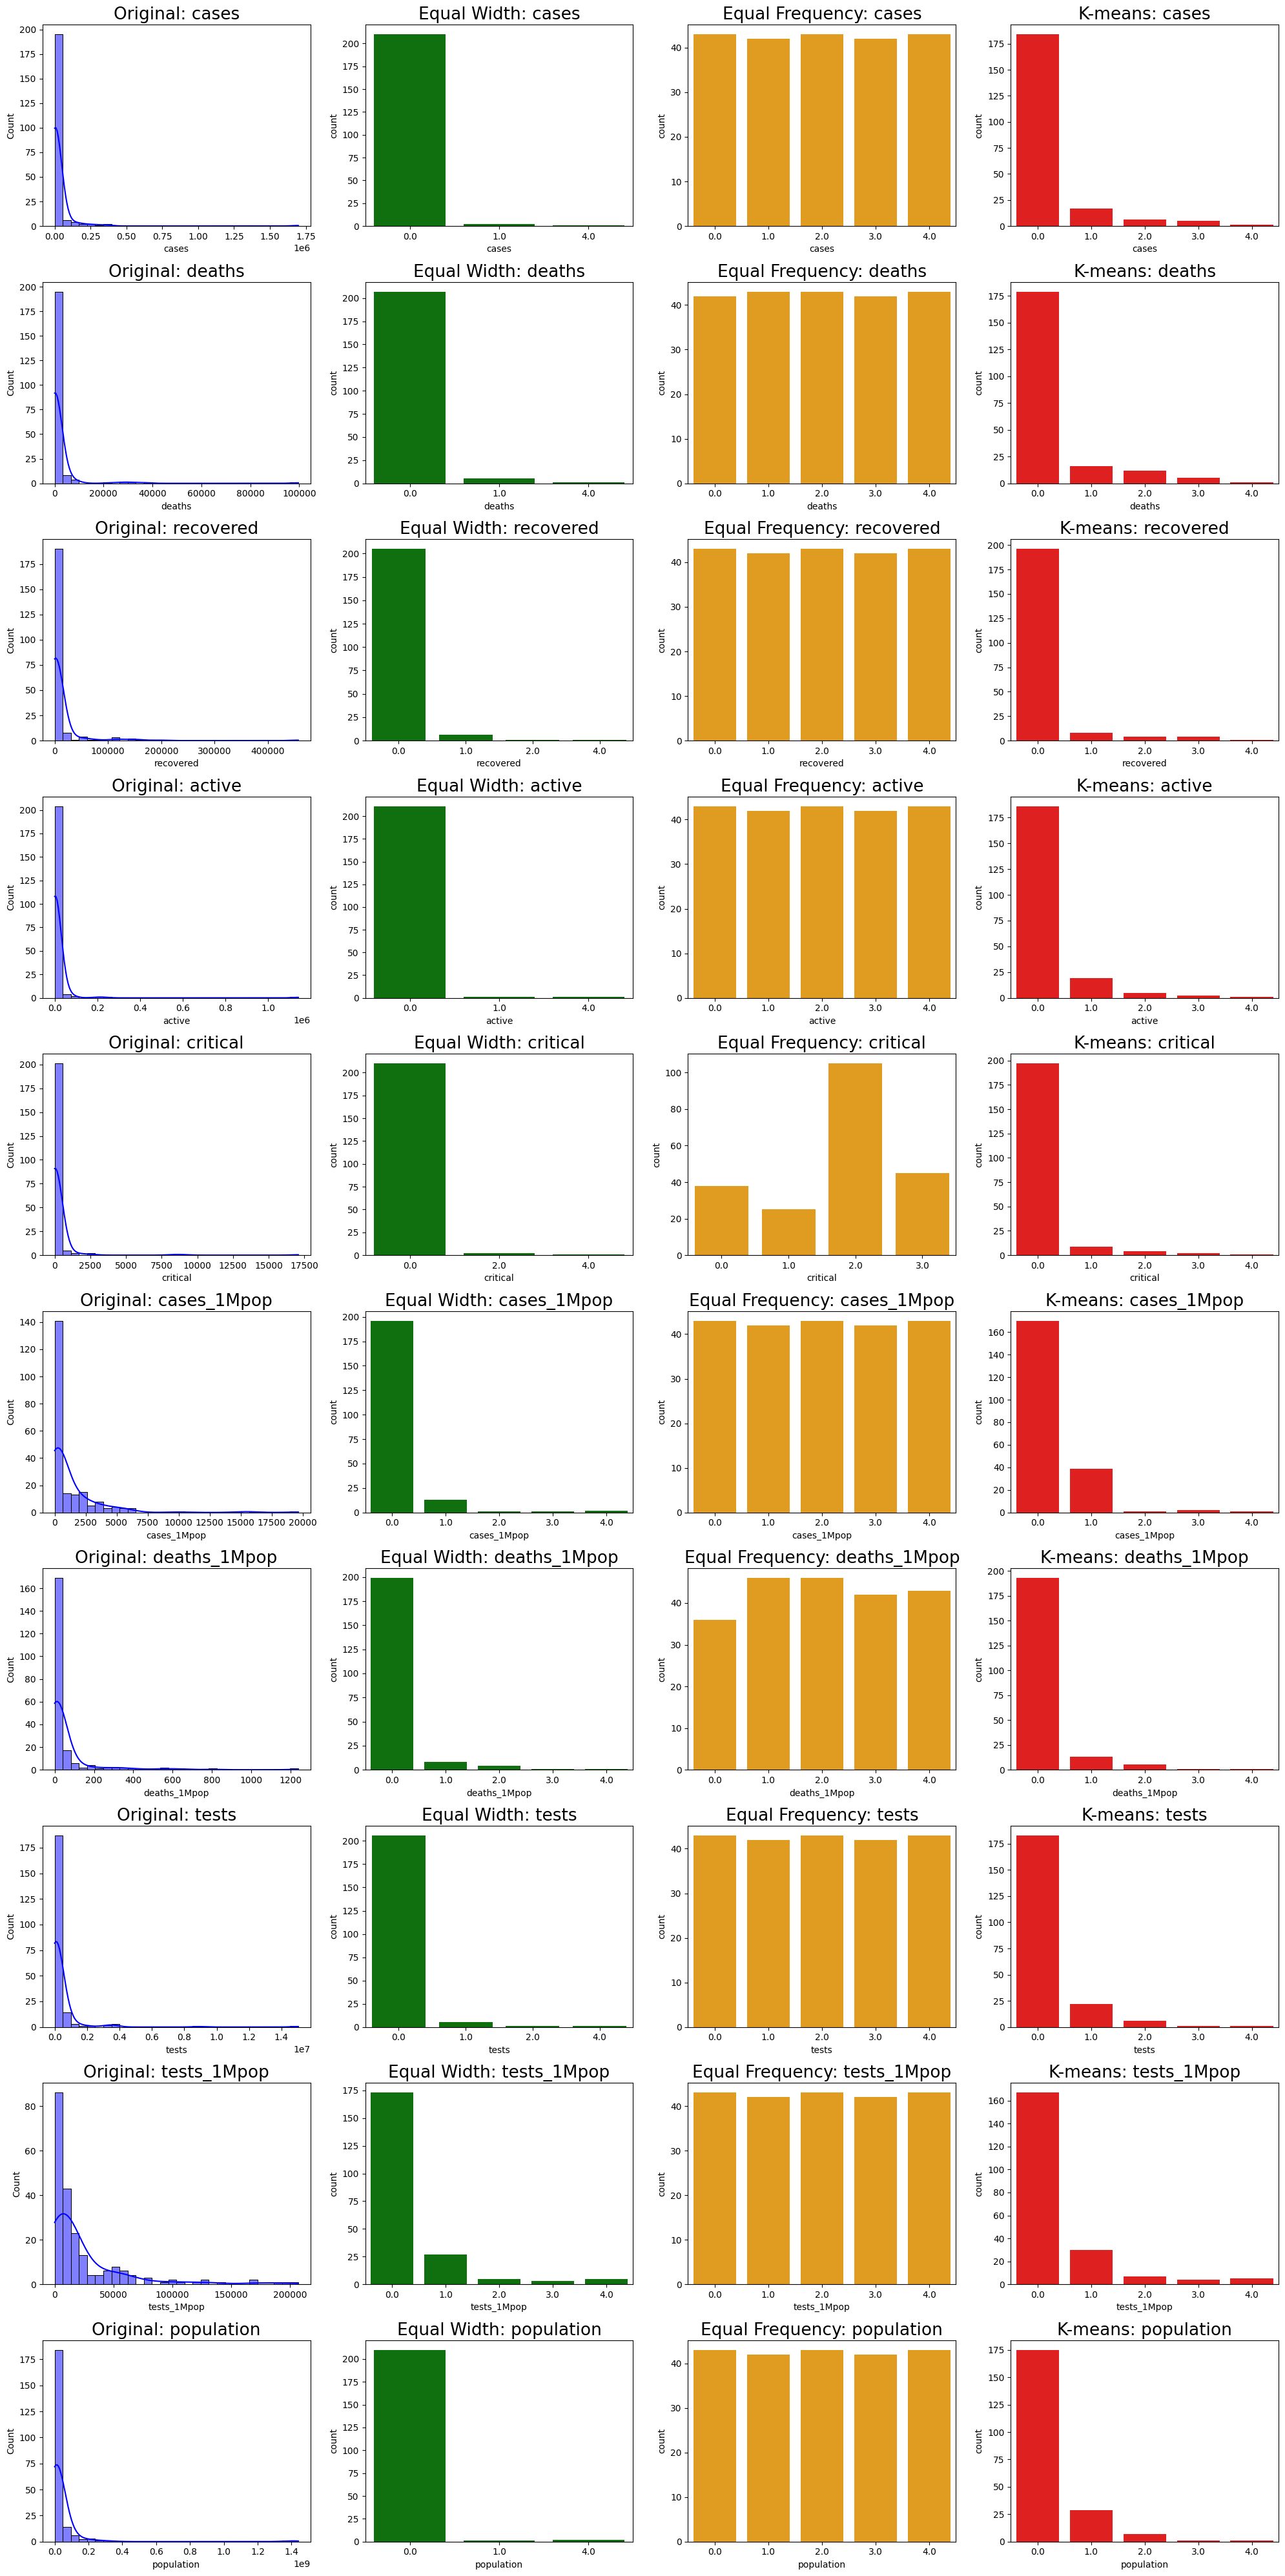

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer

# Selecciona las variables continuas
variables_continuas = ['cases', 'deaths', 'recovered', 'active', 'critical',
                       'cases_1Mpop', 'deaths_1Mpop', 'tests', 'tests_1Mpop', 'population']


# Imputar valores faltantes con la mediana
imputer = SimpleImputer(strategy='median')
df_continuas = pd.DataFrame(imputer.fit_transform(df_covid[variables_continuas]), columns=variables_continuas)
df_impute = df_continuas.copy()

# Discretización de igual ancho (intervalos)
interval_discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
df_interval = pd.DataFrame(interval_discretizer.fit_transform(df_continuas), columns=variables_continuas)

# Discretización de igual frecuencia
frequency_discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
df_frequency = pd.DataFrame(frequency_discretizer.fit_transform(df_continuas), columns=variables_continuas)

# Discretización por K-means
kmeans_discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')
df_kmeans = pd.DataFrame(kmeans_discretizer.fit_transform(df_continuas), columns=variables_continuas)

# Crear los subplots
fig, axes = plt.subplots(nrows=10, ncols=4, figsize=(20, 40))

for i, var in enumerate(variables_continuas):
    for j, df in enumerate([df_continuas, df_interval, df_frequency, df_kmeans]):
        ax = axes[i, j]

        if j == 0:
            # Histograma para la variable continua original
            sns.histplot(df[var], bins=30, kde=True, ax=ax, color='blue')
            ax.set_title(f'Original: {var}', fontsize=19)
        else:
            # Diagrama de barras para las variables discretizadas
            sns.countplot(x=df[var], ax=ax, color=['green', 'orange', 'red'][j-1])
            ax.set_title(f'{["Equal Width", "Equal Frequency", "K-means"][j-1]}: {var}', fontsize=19)

        # Ajustar las posiciones para una mejor visualización
        ax.figure.subplots_adjust(hspace=0.4)

plt.tight_layout()
plt.show()

Como ya hemos mencionado todas las variables están fuertemente sesgadas hacia la izquierda, con la mayoria de valores concentrados en el rango inferior, esto es importante para analizar los resultados de la discretización.

### **Equal Width (Intervalos de igual ancho):**

Este método divide el rango de los datos en intervalos de igual tamaño. Sin embargo, dado que la distribución original está muy sesgada, la mayoría de los datos caen en el primer intervalo, lo que genera una única barra muy alta y otras casi vacías. Esto no proporciona una buena representación de la variabilidad de los datos.

### **Equal Frequency (Intervalos de igual frecuencia):**

Aquí, los datos se dividen de manera que cada intervalo contenga aproximadamente la misma cantidad de observaciones. Este método ofrece una mejor representación en términos de frecuencia, distribuyendo los casos de manera uniforme entre los intervalos. Sin embargo, puede perder información sobre la distancia entre los valores, ya que puede agrupar datos con diferencias significativas en el mismo intervalo.

## **K-means:**

La discretización usando K-means en este caso, parece que la mayoría de los datos se agrupan en el primer bin, por lo que gran parte de los casos y muertes están muy cerca entre sí en términos absolutos, y que solo unos pocos puntos de datos se desvían significativamente de la media, apesar de esto, logra capturar un poco más de información de distintos intervlos sin perder el comportamiento de la distribución original



In [ ]:
# Discretización por función matemática (log10)
df_log10 = pd.DataFrame()
for var in variables_continuas:
    df_log10[var] = np.floor(np.log10(df_continuas[var] + 1))  # +1 para evitar log10(0)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

def discretize_with_entropy(data, variable, n_bins):
    """
    Discretiza la variable usando la entropía como criterio de división.
    """
    tree_model = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=n_bins)

    tree_model.fit(data[[variable]], np.zeros(len(data)))

    data[f'disc_{variable}_entropy'] = tree_model.apply(data[[variable]]) - 1
    return data


df_entropy = df_continuas.copy()
for var in variables_continuas:
    df_entropy = discretize_with_entropy(df_entropy, var, n_bins=5)


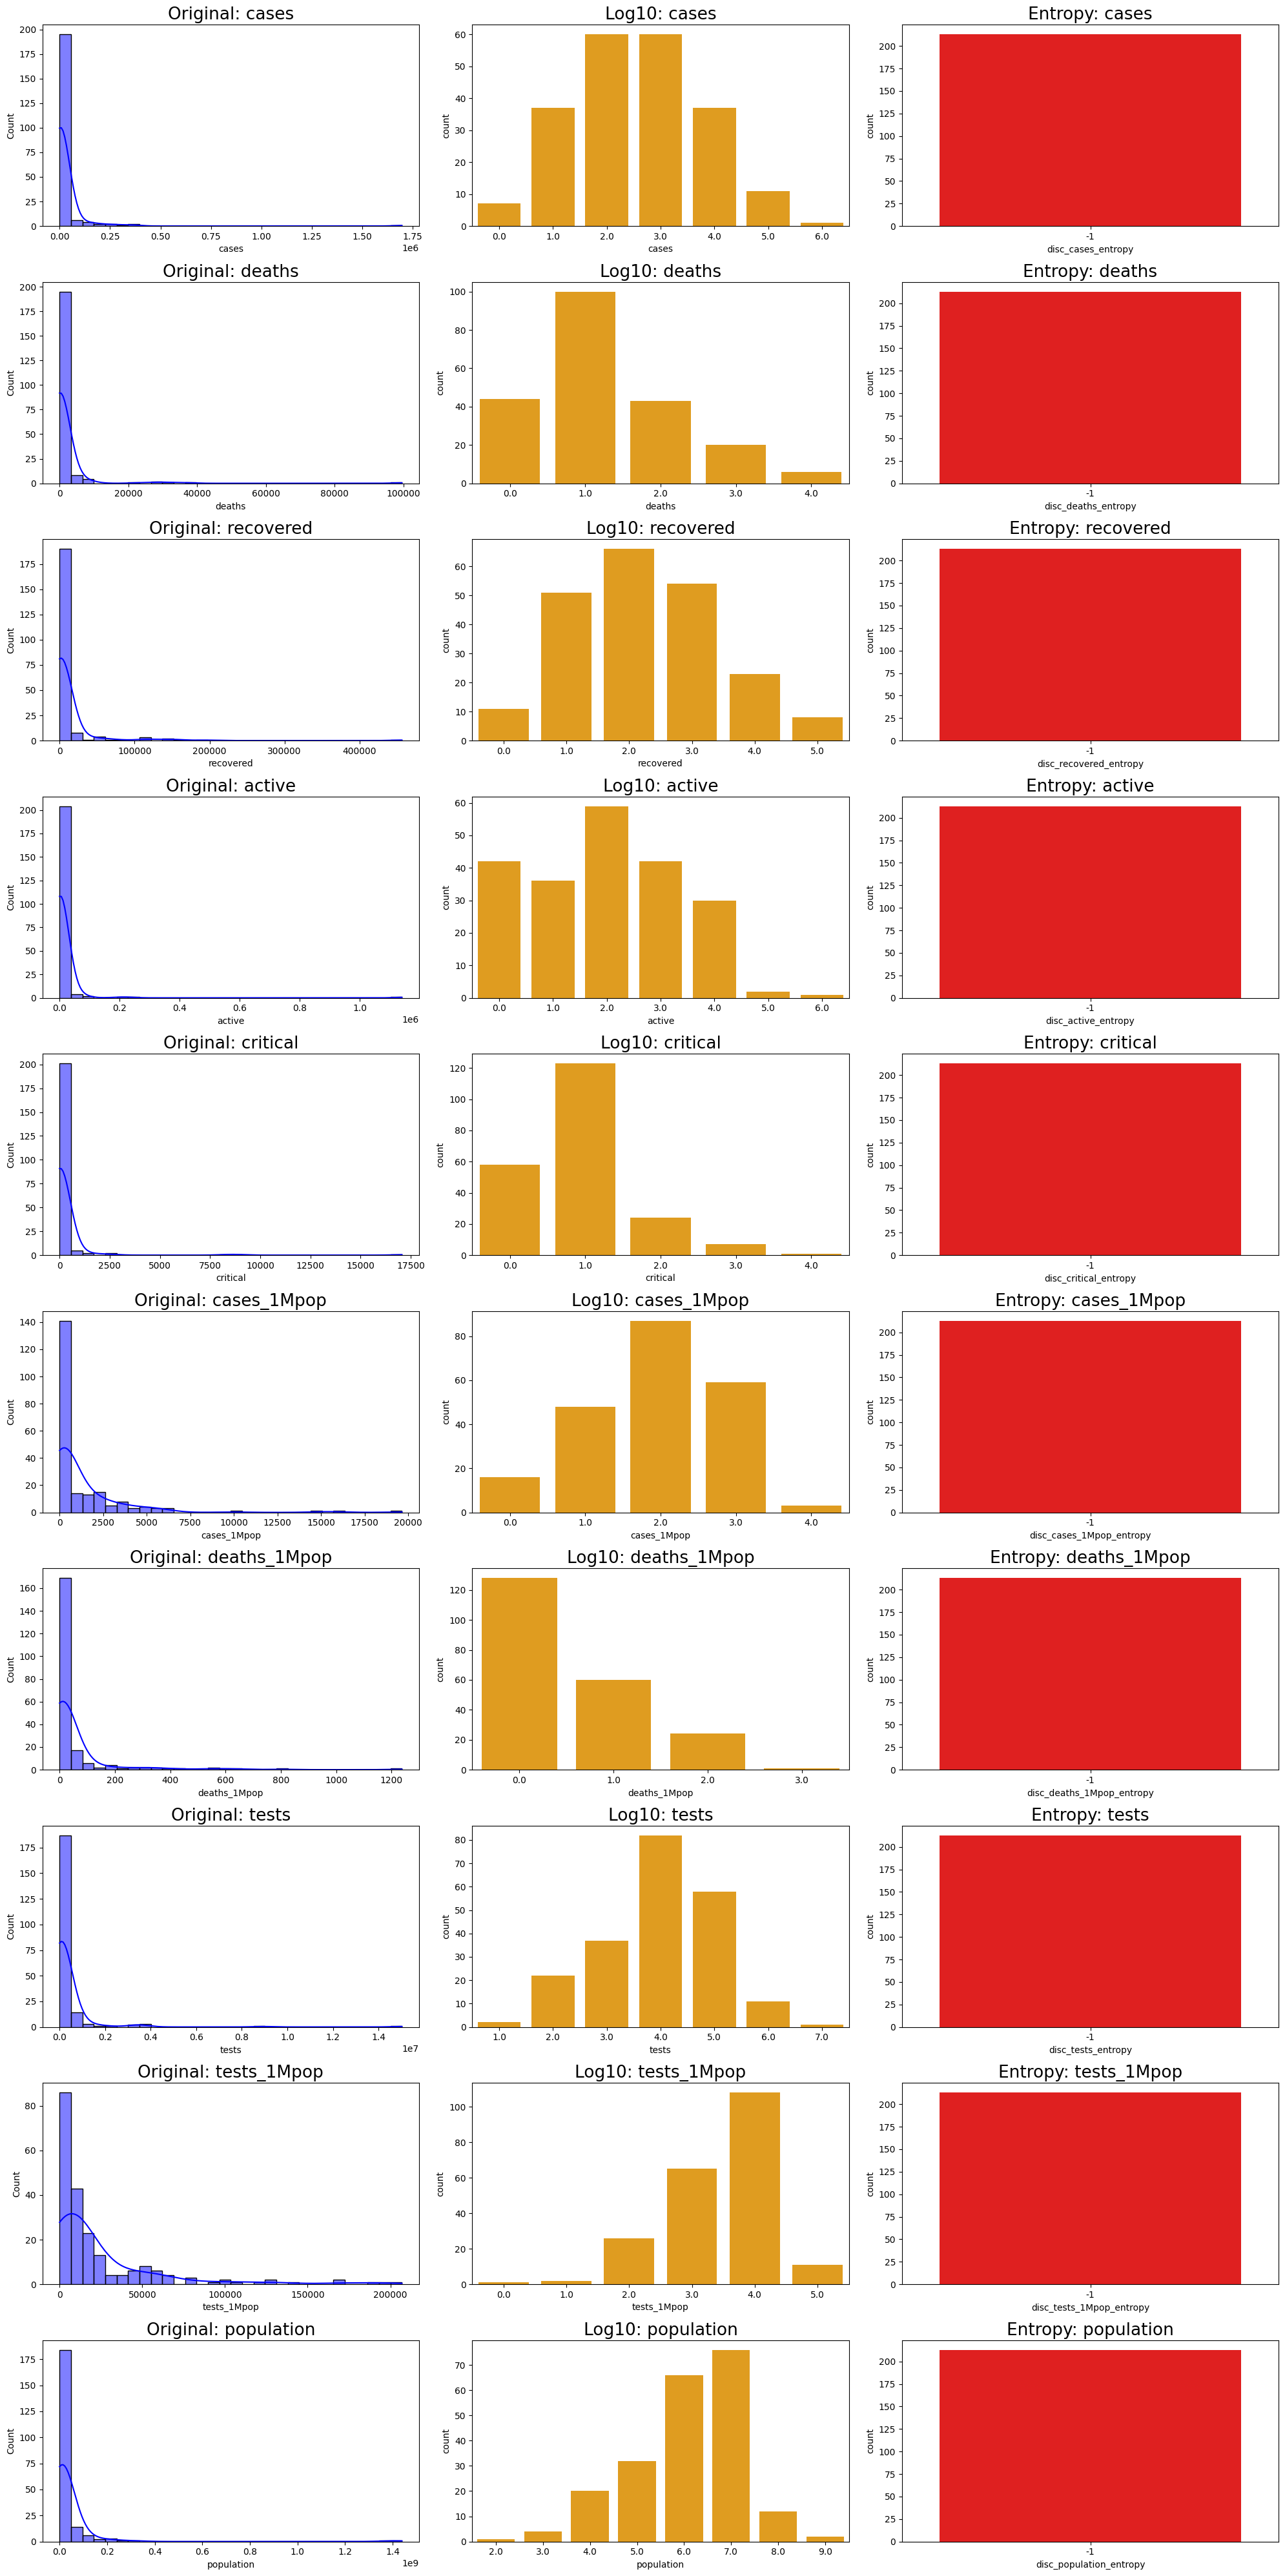

In [ ]:
# Crear los subplots
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(20, 40))

for i, var in enumerate(variables_continuas):
    for j, df in enumerate([df_continuas, df_log10, df_entropy]):
        ax = axes[i, j]

        if j == 0:
            # Histograma para la variable continua original
            sns.histplot(df[var], bins=30, kde=True, ax=ax, color='blue')
            ax.set_title(f'Original: {var}', fontsize=19)
        elif j == 1:
            # Diagrama de barras para la discretización log10
            sns.countplot(x=df[var], ax=ax, color='orange')
            ax.set_title(f'Log10: {var}', fontsize=19)
        else:
            # Diagrama de barras para la discretización por entropía
            sns.countplot(x=df[f'disc_{var}_entropy'], ax=ax, color='red')
            ax.set_title(f'Entropy: {var}', fontsize=19)

        ax.figure.subplots_adjust(hspace=0.4)

plt.tight_layout()
plt.show()


### **Logaritmo Base 10 (Log10):**

La discretización utilizando el logaritmo base 10 es particularmente útil para datos con distribuciones sesgadas y con un rango de valores muy amplio, como en este caso. Este método transforma los valores, comprimiendo los más grandes y expandiendo los más pequeños, lo que resulta en una distribución más equilibrada cuando se representan en intervalos. Una de las principales ventajas de este enfoque es que permite una visualización más clara y un análisis más manejable de variables que, de otro modo, estarían dominadas por valores extremos. Sin embargo, una desventaja es que esta compresión puede aplanar demasiado los datos, reduciendo la sensibilidad a las diferencias en los valores bajos, lo que podría llevar a la pérdida de detalles importantes en esos intervalos.

### **Entropía:**

La discretización basada en entropía intenta dividir los datos en intervalos que maximicen la información contenida en cada uno, es decir, busca optimizar la separación de los datos para reflejar la mayor cantidad de variabilidad posible. Esto es particularmente útil cuando se desea crear categorías que capturen cambios significativos en la distribución de los datos. Sin embargo, una limitación significativa es que, si los datos son demasiado homogéneos o no presentan suficientes variaciones, este método puede no encontrar puntos de corte efectivos, resultando en una sola categoría para toda la variable. Esto limita la utilidad del método en escenarios donde la variabilidad es baja, ya que no proporciona una segmentación informativa de los datos.








### D) Evaluemos posibles transformaciones para los datos

Se detectó que en la fila 128 hay un error en el registo dado que la cantidad de casos activos son negativos, esto puede afectar las transformaciónes, por tanto pensamos que es un error de digitación y lo pondremos como positivo

In [ ]:
df_covid.iloc[[128]]

rank          country  cases  deaths  recovered  active  critical  \
129   130  Channel Islands  558.0    45.0      517.0    -4.0       NaN   

     cases_1Mpop  deaths_1Mpop    tests  tests_1Mpop  population continent  
129       3212.0         259.0  10255.0      59039.0    173698.0    Europe

In [ ]:
df_covid.iloc[128, 5] = 4

Posteriormente se aplicará transformación raiz cuadrada y logarítmica a cada una de las variables numéricas y se medirá el sesgo asociado a cada transformación, con el fin de determinar si alguna transformación de los datos puede mejorar la simetría de estos.

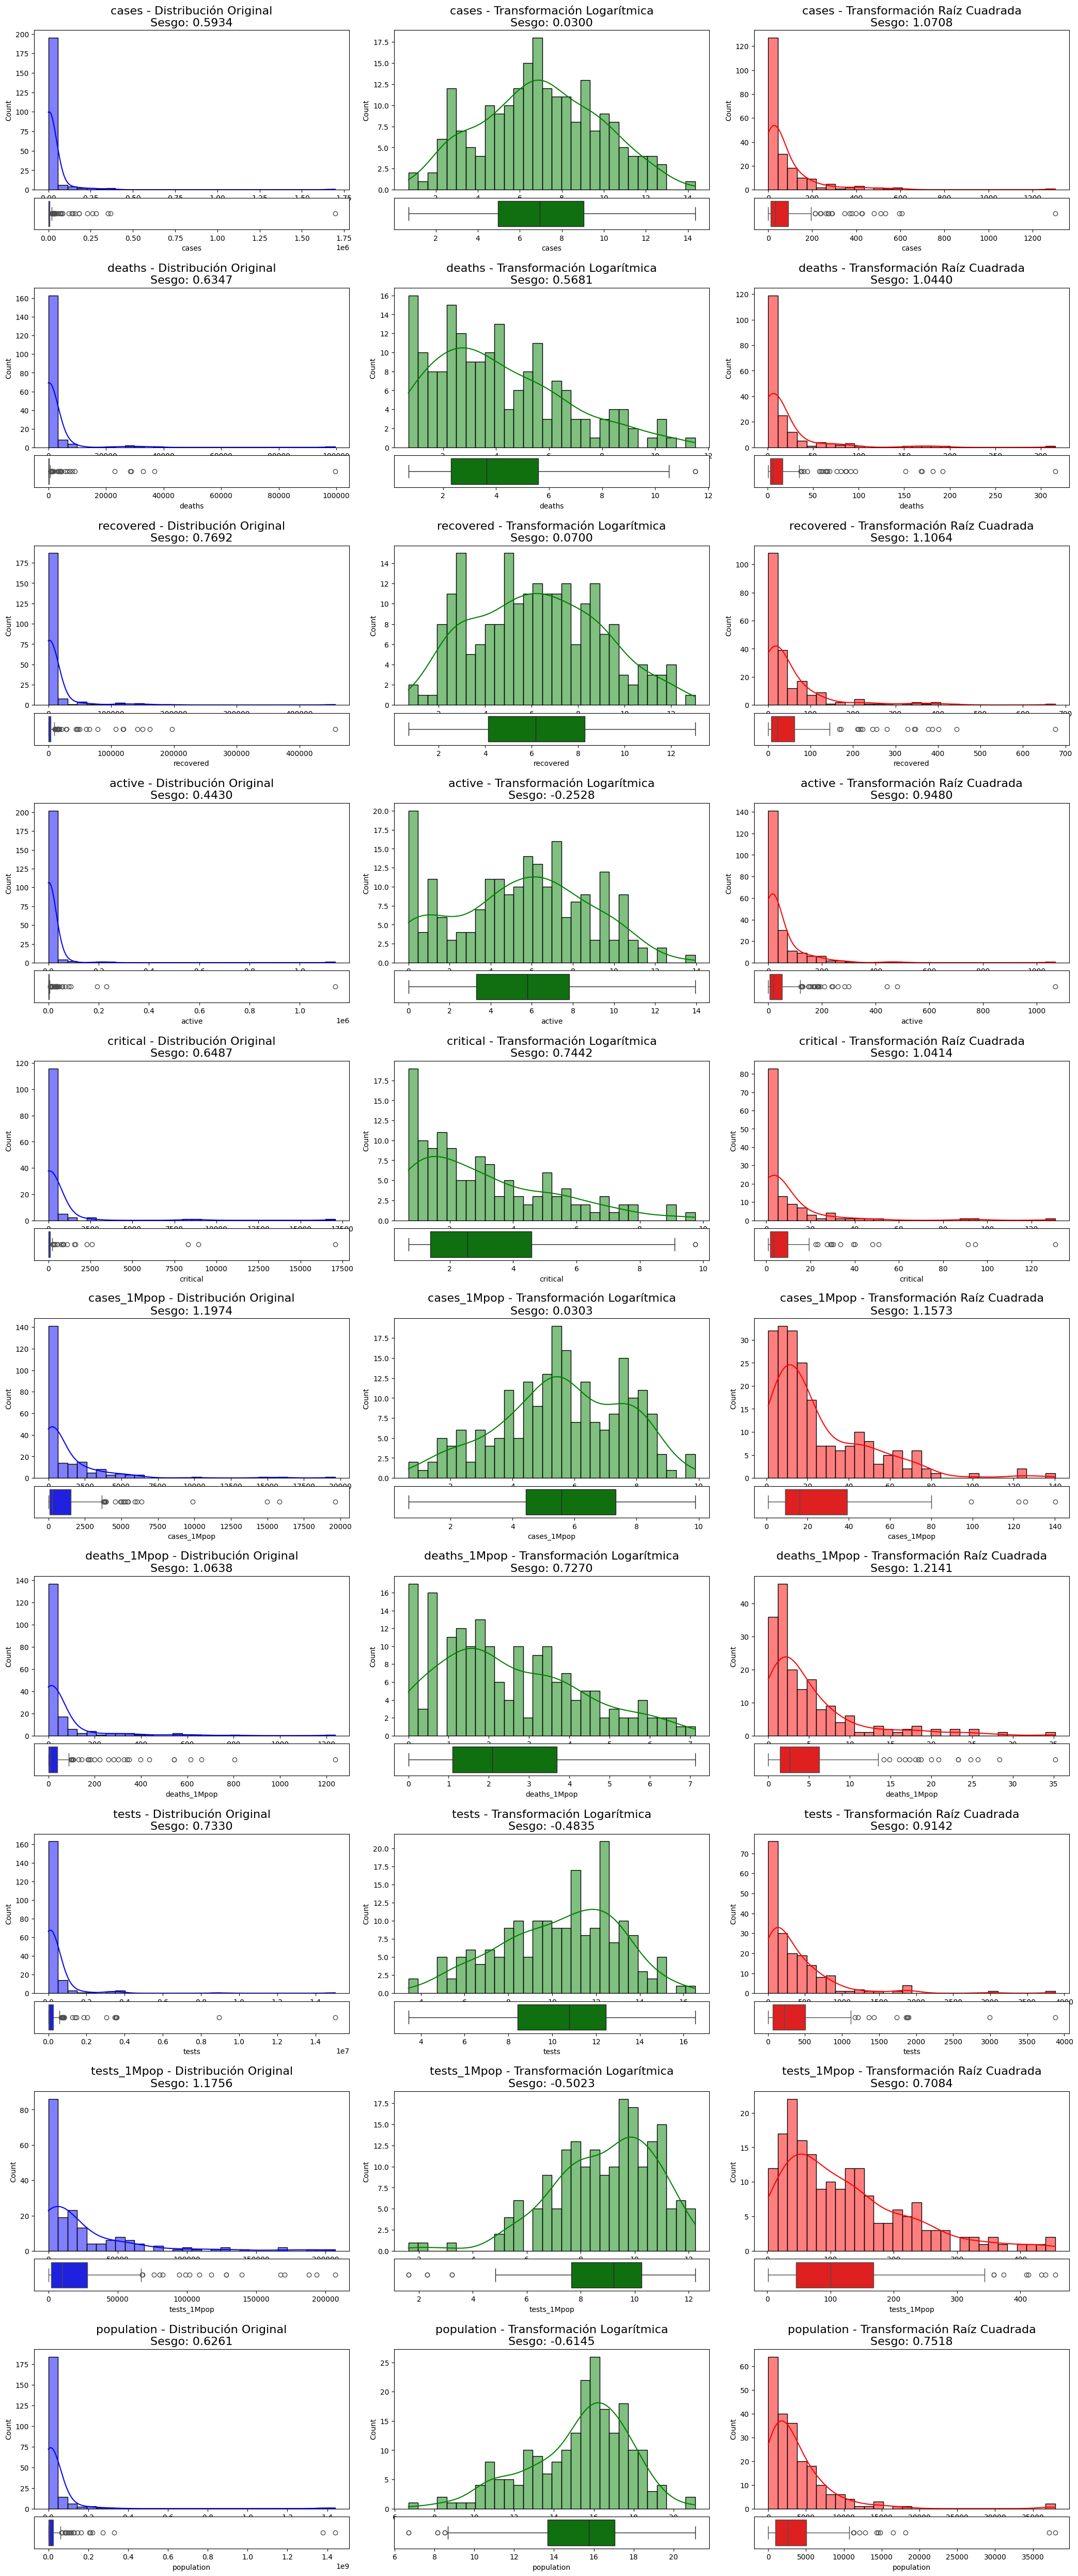

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Función para calcular la métrica de sesgo
def calcular_sesgo(data):
    media = data.mean()
    mediana = data.median()
    desvio = data.std()
    sesgo = 3 * (media - mediana) / desvio
    return sesgo

# Selecciona las variables continuas
variables_continuas = ['cases', 'deaths', 'recovered', 'active', 'critical',
                       'cases_1Mpop', 'deaths_1Mpop', 'tests', 'tests_1Mpop', 'population']

# Crear subplots
fig, axes = plt.subplots(nrows=len(variables_continuas), ncols=3, figsize=(21, 5 * len(variables_continuas)))

# Iterar sobre cada variable
for i, var in enumerate(variables_continuas):
    # Datos originales
    data_original = df_covid[var]

    # Transformación logarítmica (agregamos una pequeña constante para evitar log(0))
    data_log = np.log1p(data_original)

    # Transformación raíz cuadrada
    data_sqrt = np.sqrt(data_original)

    # Calcular el sesgo antes y después de las transformaciones
    sesgo_original = calcular_sesgo(data_original)
    sesgo_log = calcular_sesgo(data_log)
    sesgo_sqrt = calcular_sesgo(data_sqrt)

    # Graficar la distribución original
    sns.histplot(data_original, bins=30, kde=True, ax=axes[i, 0], color='blue')
    axes[i, 0].set_title(f'{var} - Distribución Original\nSesgo: {sesgo_original:.4f}', fontsize=16)

    # Boxplot en la misma figura para la distribución original
    ax_box_orig = axes[i, 0].inset_axes([0, -0.25, 1, 0.2])
    sns.boxplot(x=data_original, ax=ax_box_orig, color='blue')
    ax_box_orig.set_yticks([])

    # Graficar la distribución después de la transformación logarítmica
    sns.histplot(data_log, bins=30, kde=True, ax=axes[i, 1], color='green')
    axes[i, 1].set_title(f'{var} - Transformación Logarítmica\nSesgo: {sesgo_log:.4f}', fontsize=16)

    # Boxplot en la misma figura para la transformación logarítmica
    ax_box_log = axes[i, 1].inset_axes([0, -0.25, 1, 0.2])
    sns.boxplot(x=data_log, ax=ax_box_log, color='green')
    ax_box_log.set_yticks([])

    # Graficar la distribución después de la transformación de raíz cuadrada
    sns.histplot(data_sqrt, bins=30, kde=True, ax=axes[i, 2], color='red')
    axes[i, 2].set_title(f'{var} - Transformación Raíz Cuadrada\nSesgo: {sesgo_sqrt:.4f}', fontsize=16)

    # Boxplot en la misma figura para la transformación de raíz cuadrada
    ax_box_sqrt = axes[i, 2].inset_axes([0, -0.25, 1, 0.2])
    sns.boxplot(x=data_sqrt, ax=ax_box_sqrt, color='red')
    ax_box_sqrt.set_yticks([])

# Ajustar layout para evitar solapamientos
plt.tight_layout()
plt.show()


Se observa que para todos los variables excepto para la variable $critical$, la transformación logarítmica mejora notablemente el sesgo de las varibles. dando una mayor simetría y reduciendo los outliers

### E.)

Se observa que hay varias variables con datos NA dado que los datos originales tenían ya estos NA por tanto, para lograr hacer el binning satisfactoriamente decidimos imputar estos datos.

Se imputara usando la mediana debido a que, al ser datos con sesgos la mediana puede ser un método mas adecuado

Por otra parte, se utilizará la transformación logarítimica para el binning que es la que parece tener un sesgo mas bajo.

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer


variables_continuas = ['cases', 'deaths', 'recovered', 'active', 'critical',
                       'cases_1Mpop', 'deaths_1Mpop', 'tests', 'tests_1Mpop', 'population']

# Transformaciones: logarítmica y raíz cuadrada
data_transformada_log = df_imputed.apply(np.log1p)

# Definir la cantidad de bins
n_bins = 5

# Binning por frecuencia
def binning_por_frecuencia(data):
    est = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='quantile')
    return est.fit_transform(data)

# Binning por ancho
def binning_por_ancho(data):
    est = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
    return est.fit_transform(data)

# Binning por KMeans
def binning_por_kmeans(data):
    kmeans =  KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='kmeans')
    return kmeans.fit_transform(data)

# Aplicar binnings
data_log_freq = binning_por_frecuencia(data_transformada_log)
data_log_ancho = binning_por_ancho(data_transformada_log)
data_log_kmeans = binning_por_kmeans(data_transformada_log)

# Función para calcular el sesgo de cada columna de un conjunto de datos
def calcular_sesgos(data):
    return [calcular_sesgo(data[:, i]) for i in range(data.shape[1])]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:322: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 4 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


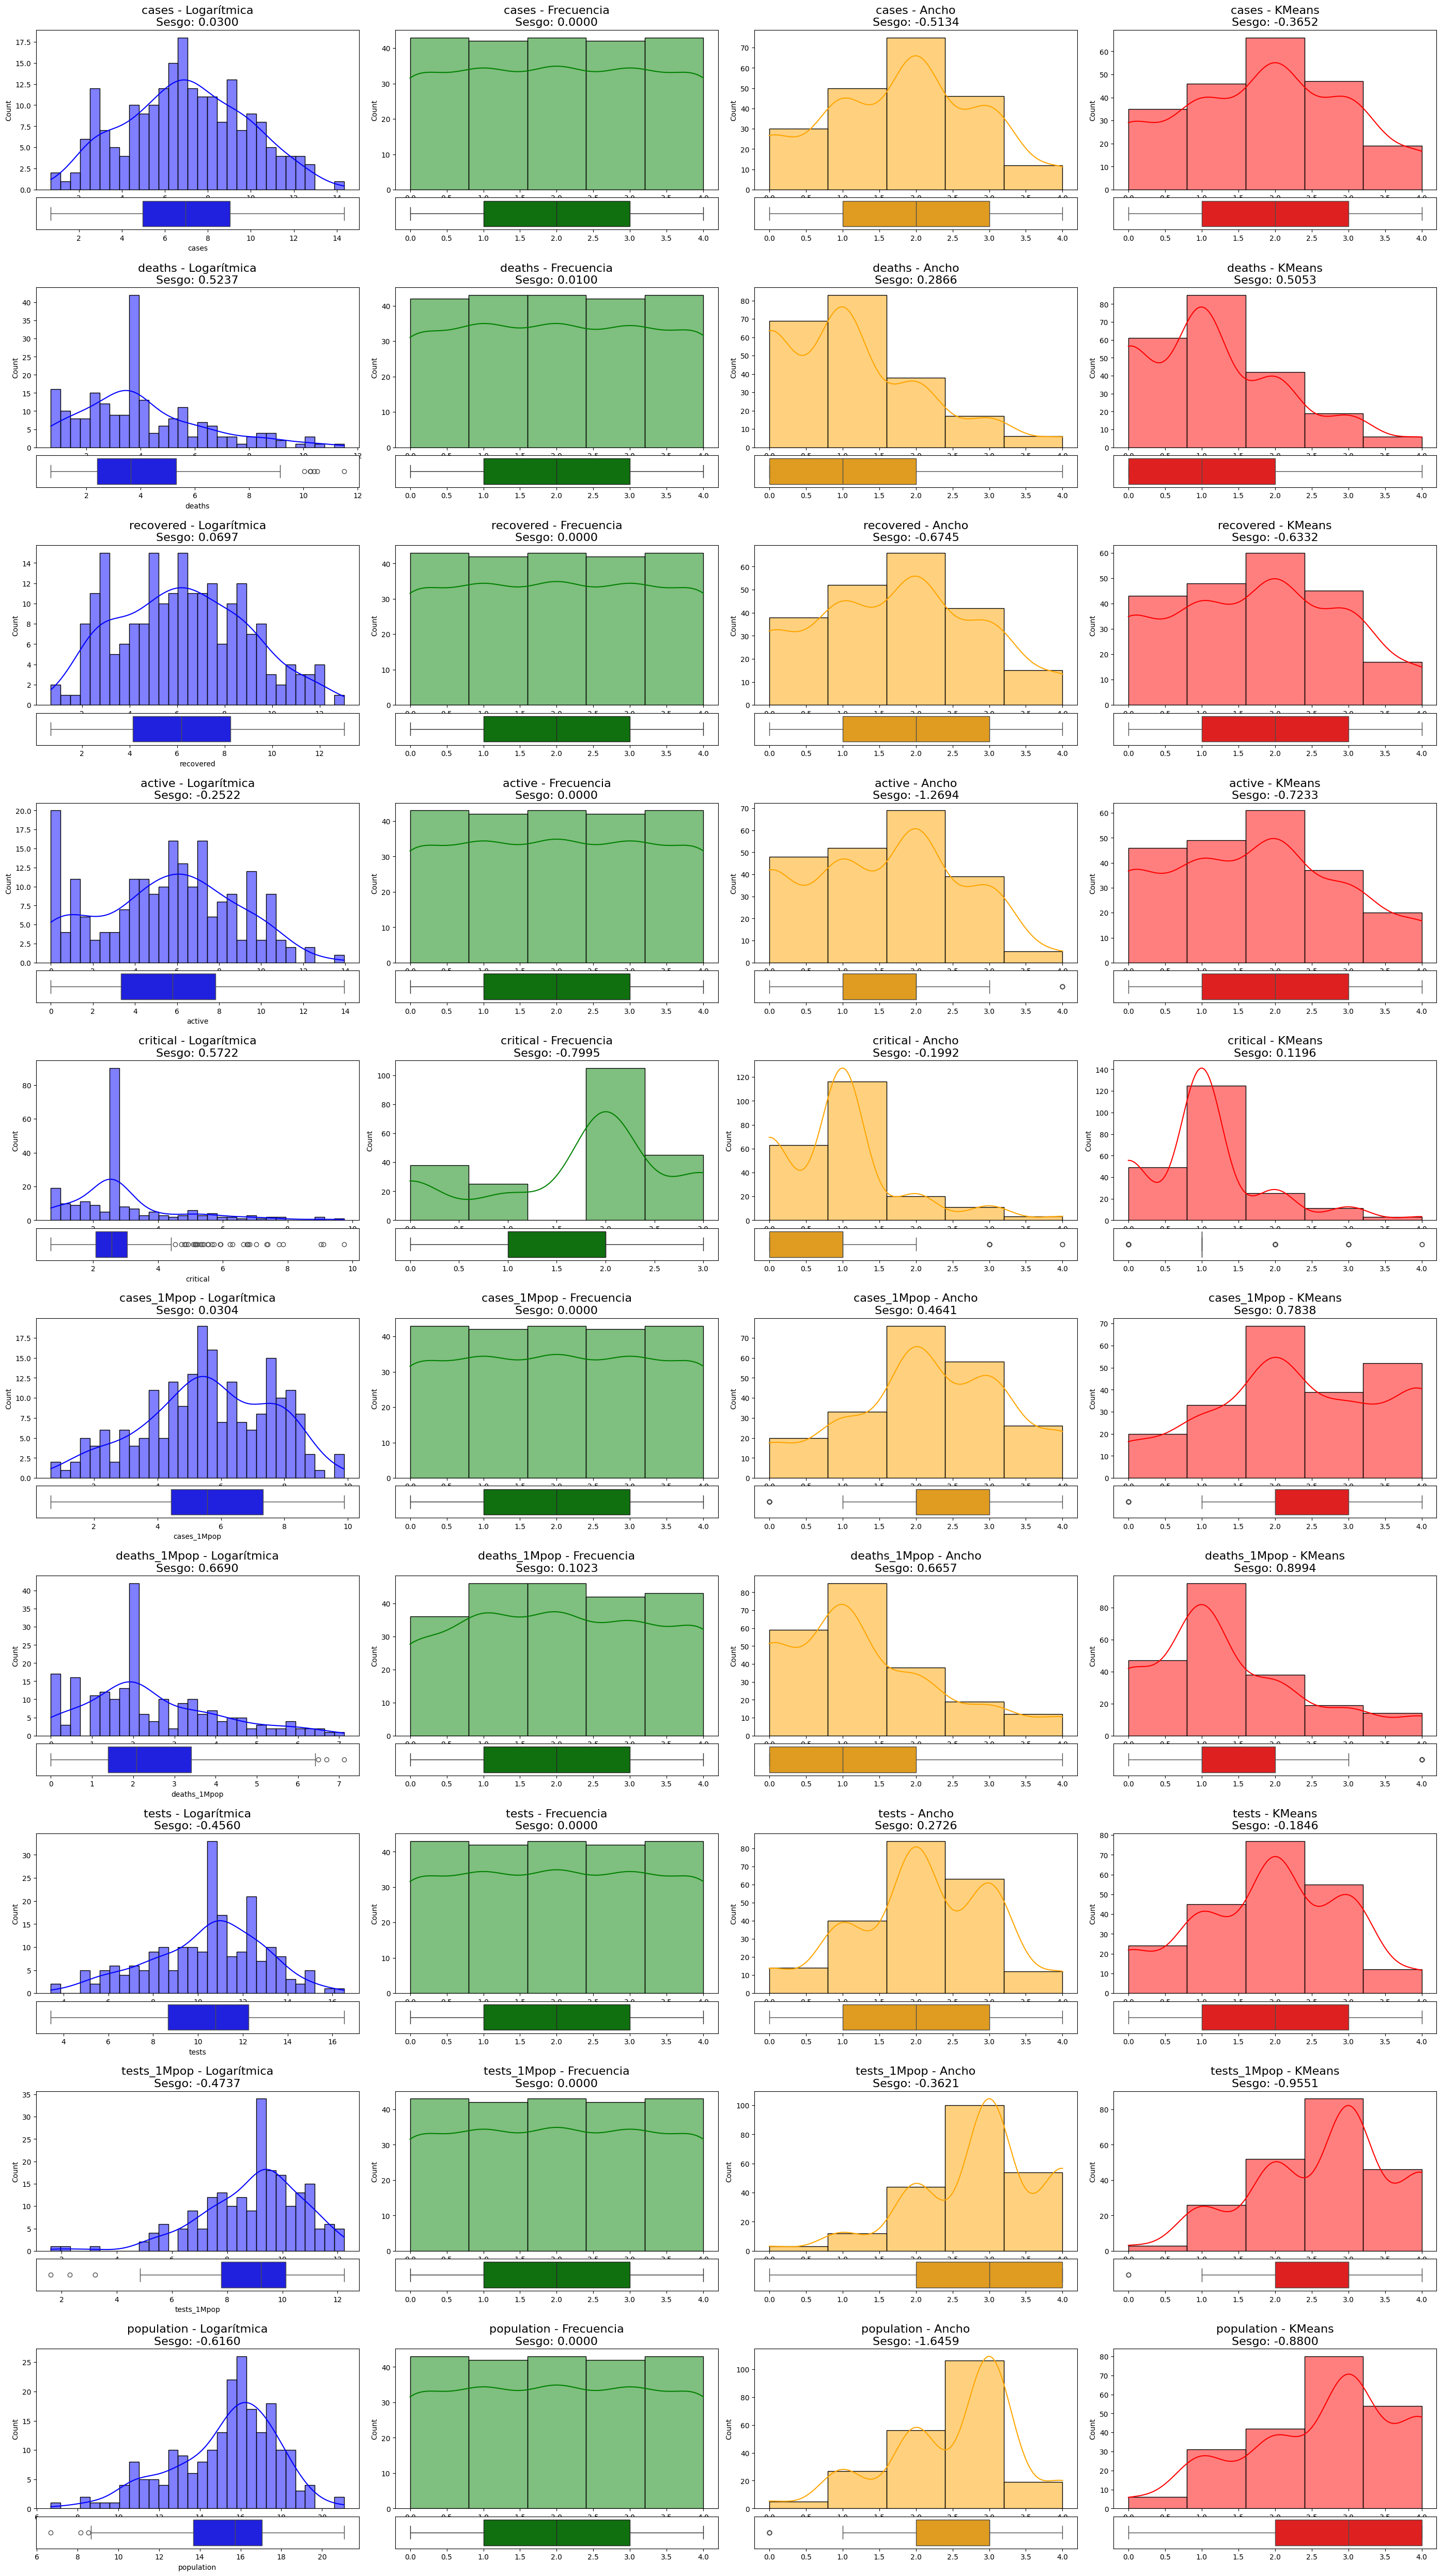

In [ ]:
# Agregar transformación logarítmica a los métodos
binning_methods = ['Logarítmica', 'Frecuencia', 'Ancho', 'KMeans']
data_binnings = [data_transformada_log] + [data_log_freq, data_log_ancho, data_log_kmeans]

# Crear subplots con una columna adicional para la transformación logarítmica
fig, axes = plt.subplots(nrows=len(variables_continuas), ncols=4, figsize=(28, 5 * len(variables_continuas)))

# Iterar sobre cada variable y aplicar las transformaciones de binning
for i, var in enumerate(variables_continuas):
    for j, method in enumerate(binning_methods):
        # Datos después del binning o de la transformación logarítmica
        if method == 'Logarítmica':
            data_binned = data_transformada_log[var]
            data_sesgo = calcular_sesgo(data_binned)
        else:
            data_binned = data_binnings[j][:, i]
            data_sesgo = calcular_sesgo(data_binned)

        # Crear título para cada subplot
        title = f'{var} - {method}\nSesgo: {data_sesgo:.4f}'

        # Graficar histograma con densidad
        sns.histplot(data_binned, bins=n_bins if method != 'Logarítmica' else 30, kde=True, ax=axes[i, j], color=['blue', 'green', 'orange', 'red'][j])
        axes[i, j].set_title(title, fontsize=16)

        # Boxplot en la misma figura para cada binning
        ax_box = axes[i, j].inset_axes([0, -0.25, 1, 0.2])
        sns.boxplot(x=data_binned, ax=ax_box, color=['blue', 'green', 'orange', 'red'][j])
        ax_box.set_yticks([])

# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.show()


El método de binning que mostro una mayor perturbación en la distribución de los datos y el sesgo fue el método de binning por frecuencia. Sin embarga, no se puede constatar una mejoría notable en el sesgo entre la transformación logarítmica y algun metodo de bining.

### F)